## Visualizing Data in Python
### Tables, Histograms, Boxplots, and other common plots

When working with a new dataset, one of the most useful things to do is to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us and we can gain insights into the data that we may not discover otherwise.

Let's learn how to perform basic visualisations in Python, and, learn how to begin exploring data from a graphical perspective.

In [1]:
#### Importing libriaries
import numpy as np 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### This week we will use multiple data files, let's save files location paths in a variable url, as usual
urltripv = "tripv2pub.csv"
urlhhv = "hhv2pub.csv"
urlperv = "perv2pub.csv"
urllong = "ldtv2pub.csv"

#### Read the .csv files using `pandas` libriary and store it as a `pandas` Data Frame
dt = pd.read_csv(urltripv)
dh = pd.read_csv(urlhhv)
dp = pd.read_csv(urlperv)
dl = pd.read_csv(urllong)

#### Let's now check what data type we stored into `df`. This code will output object type
pd.set_option('display.max_columns', None)

In [3]:
dl.head(5)

,HOUSEID,PERSONID,LONGDIST,MAINMODE,INT_FLAG,LD_NUMONTRP,ONTP_P1,ONTP_P2,ONTP_P3,ONTP_P4,ONTP_P5,ONTP_P6,ONTP_P7,ONTP_P8,ONTP_P9,ONTP_P10,FARREAS,LD_AMT,LD_ICB,LDT_FLAG,BEGTRIP,ENDTRIP,NTSAWAY,WEEKEND,MRT_DATE,FARCDIV,FARCREG,GCDTOT,AIRSIZE,EXITCDIV,GCD_FLAG,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HHFAMINC_IMP,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,TRAVDAY,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,WTPERFIN,WTPERFIN5D,WTPERFIN2D,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,R_SEX_IMP,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,9000013002,1,1,1,1,2,1,1,2,2,-9,-9,-9,-9,-9,-9,2,0,0,2,202202,202202,3,2,202202,1,1,61.868800,-1,-1,1,2,1,1,1,1,2,2,11,11,11,1,4,2,4,1,5,1,1,4,1,202202,1,1021,3938.688806,0.000000,13363.809355,39,2,2,1,1,2,1,7,2,4,20,4,2,5,5,4,3
1,9000013002,2,1,3,1,2,1,1,2,2,-9,-9,-9,-9,-9,-9,2,0,0,2,202202,202202,3,2,202202,1,1,61.868800,-1,-1,1,2,1,1,1,1,2,2,11,11,11,1,4,2,4,1,5,1,1,4,1,202202,1,1021,5409.514573,0.000000,19360.094919,42,1,1,1,1,2,2,7,1,4,20,4,2,5,5,4,3
2,9000013002,3,0,3,1,5,1,1,1,1,-9,-9,-9,-9,-9,-9,2,0,0,2,-9,-9,-9,-9,-9,5,3,382.211335,-1,-1,1,2,1,1,1,1,2,2,11,11,11,1,4,2,4,1,5,1,1,4,1,202202,1,1021,3013.582163,0.000000,7285.044994,8,-7,-1,-1,1,2,2,-1,1,4,20,4,2,5,5,4,3
3,9000013002,4,0,3,1,5,1,1,1,1,-9,-9,-9,-9,-9,-9,2,0,0,2,-9,-9,-9,-9,-9,5,3,382.211335,-1,-1,1,2,1,1,1,1,2,2,11,11,11,1,4,2,4,1,5,1,1,4,1,202202,1,1021,6214.108740,0.000000,27109.336829,5,-7,-1,-1,1,2,2,-1,1,4,20,4,2,5,5,4,3
4,9000013016,1,0,1,1,2,1,1,-9,-9,-9,-9,-9,-9,-9,-9,2,0,0,2,-9,-9,-9,-9,-9,1,1,98.118536,-1,-1,1,2,3,2,1,1,2,2,13,7,7,1,2,1,2,3,3,4,1,2,1,202202,2,1021,3183.420810,4177.234452,0.000000,32,2,1,1,1,2,1,6,2,3,80,7,3,8,90,7,6


# Let's start with the simple curve plot

### Subplots

What if we want to put plots with different graphs side by side? This can be achived with subplots function.
We will be utilizing subplots as it is a useful concept. Make sure to understand principles behind it!

## Scatterplots with Seaborn

A Scatter Plot has points that show the relationship between two sets of data (for both continuous and discrete data types) 

<Figure size 1600x800 with 0 Axes>

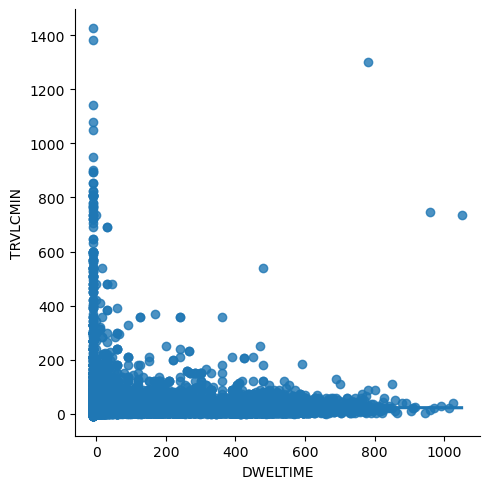

In [4]:
#### Create Scatterplot using variables related to day of the week and purpose of the trip
plt.figure(figsize = (16,8)) # Let's use this all the time!
sns.lmplot(x = 'DWELTIME', y = 'TRVLCMIN', data = dt)

plt.show()

In [5]:
dt['TRAVDAY'].unique()

array([1, 4, 5, 6, 3, 2, 7])

In [6]:
dt['TRIPPURP'].unique()

array([ 3,  2,  5,  4,  1, -9])

In [7]:
#### Now we will use map function to create new values in that column based on data in TRAVDAY column
day_map = {'1': "Sunday",
           '2': "Monday",
           '3': "Tuesday",
           '4': "Wednesday",
           '5': "Thursday",
           '6': "Friday",
           '7': "Saturday",}

purpose_map = {'1': "1 Home-based work",
               '2': "2 Home-based shopping",
               '3': "3 Home-based social/recreational",
               '4': "4 Home-based other",
               '5': "5 Not a home-based trip"}

# Create the new columns directly from the mapping we have created
dt['TRAVDAY'] = dt['TRAVDAY'].astype(str).str.strip()
dt['Day of the Week'] = dt['TRAVDAY'].astype(str).map(day_map)
dt['Purpose of the Trip'] = dt['TRIPPURP'].astype(str).map(purpose_map)



In [8]:
dt_1 = dt[dt["TRIPPURP"] != -9]

In [9]:
dt_1['Purpose of the Trip'].unique()

array(['3 Home-based social/recreational', '2 Home-based shopping',
       '5 Not a home-based trip', '4 Home-based other',
       '1 Home-based work'], dtype=object)

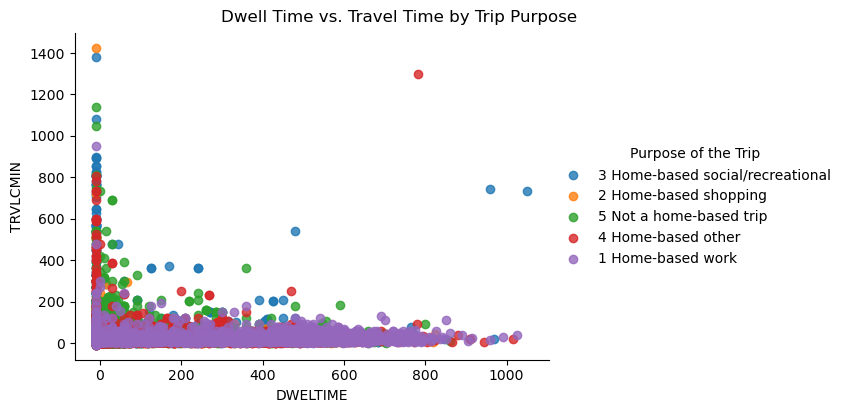

In [10]:
### Create the Scatterplot using the numeric columns
g = sns.lmplot(x = 'DWELTIME',
                y = 'TRVLCMIN',
                data = dt_1,
                fit_reg = False,
                height = 4,
                aspect = 1.5,
                hue = 'Purpose of the Trip' )

### Add a title for clarity
g.fig.suptitle('Dwell Time vs. Travel Time by Trip Purpose', y = 1.02)


plt.show()

In [11]:
dt_2 = dt[(dt["TRIPPURP"] != -9) & (dt["TRVLCMIN"] < 200) & (dt["TRVLCMIN"] > 0)]

In [12]:
dt_2['Day of the Week'].unique()

array(['Sunday', 'Wednesday', 'Thursday', 'Friday', 'Tuesday', 'Monday',
       'Saturday'], dtype=object)

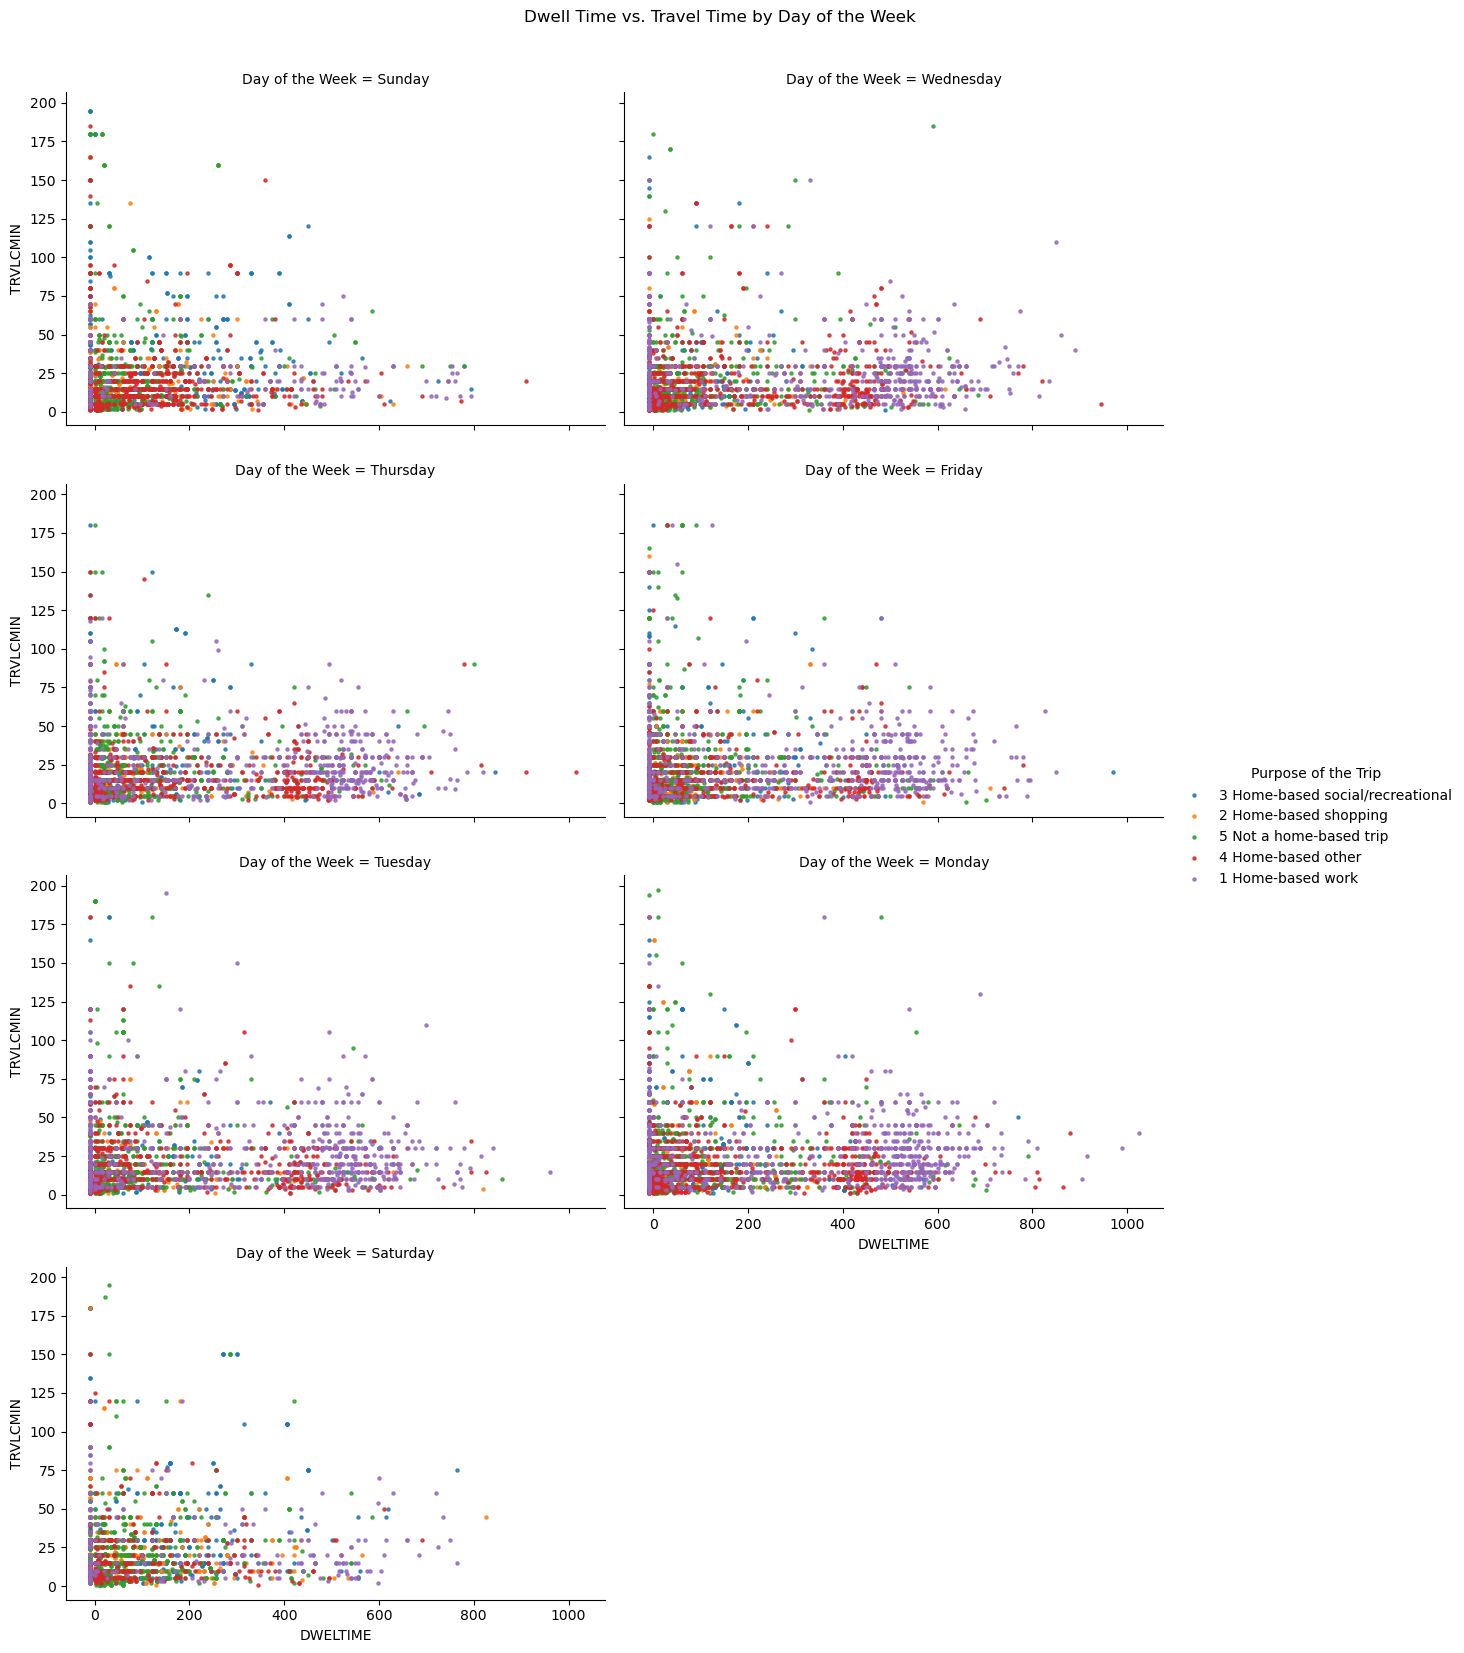

In [13]:
#### Let's look into some scatterplot arguments
g = sns.lmplot(x = 'DWELTIME',
                y = 'TRVLCMIN',
                data = dt_2,
                hue = 'Purpose of the Trip',
                col = 'Day of the Week',          # <-- Create a column of plots for each day
                col_wrap = 2,             # <-- Wrap to the next row after 2 plots, try changing this to 3
                fit_reg = False,          # Remove regression line
                height = 4,
                aspect = 1.5,
                scatter_kws={'s': 5}
                )

### Add an overall title for the entire figure
g.fig.suptitle('Dwell Time vs. Travel Time by Day of the Week', y = 1.03) # y adjusts title position

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


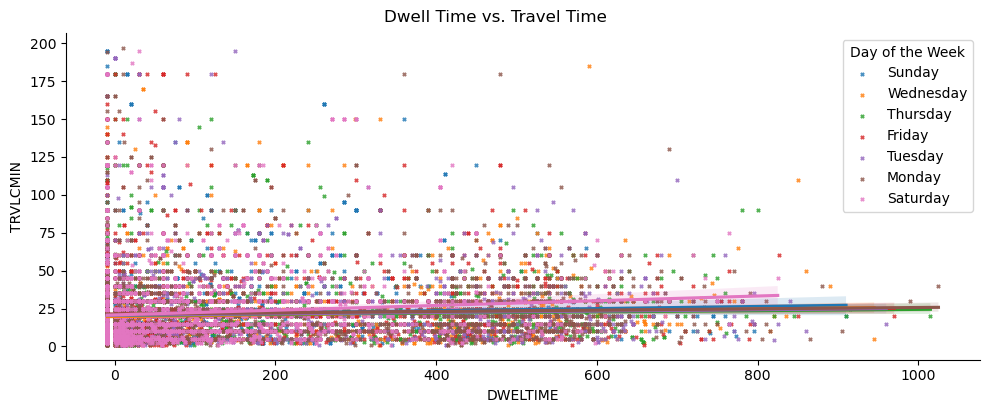

In [14]:
#### Let's repeat but with colors based on day of the travel
g = sns.lmplot(x = 'DWELTIME', y = 'TRVLCMIN', data = dt_2,
           ci = 99, # Size of the confidence interval for the regression estimate
           height = 4,
           aspect = 2.5, # Width will be 2.5 * height (i.e., 10 inches wide)
           hue = 'Day of the Week', 
           scatter_kws = {"s": 5}, # Change size of the markers
           markers = "x",
           legend_out = False)  # Moves the legend inside the plot area


### Add a title
g.fig.suptitle('Dwell Time vs. Travel Time', y = 1.02)


plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


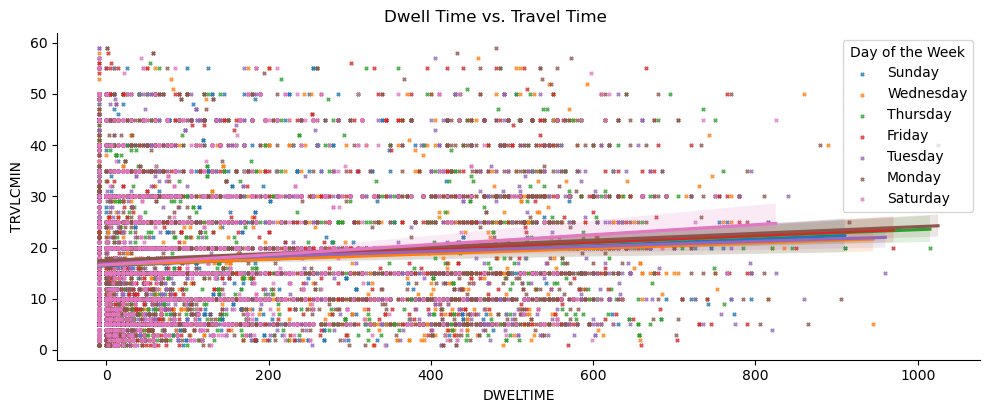

In [15]:
#### Still unclear... Let's use trips up to 60 minutes
#### Let's repeat the previous graph but remove all traveles longer then 200 minutes
dt_3 = dt[(dt["TRIPPURP"] != -9) & (dt["TRVLCMIN"] < 60) & (dt["TRVLCMIN"] > 0)]
g = sns.lmplot(x = 'DWELTIME', y = 'TRVLCMIN', data = dt_3,
           ci = 99, # Size of the confidence interval for the regression estimate
           height = 4,
           aspect = 2.5, # Width will be 2.5 * height (i.e., 10 inches wide)
           hue = 'Day of the Week', 
           scatter_kws = {"s": 5}, # Change size of the markers
           markers = "x",
           legend_out = False)  # Moves the legend inside the plot area


### Add a title
g.fig.suptitle('Dwell Time vs. Travel Time', y = 1.02)


plt.show()

# Swarmplot
Draw a categorical scatterplot with points adjusted to be **non-overlapping**.
Let's try it for travel time distribution for weekends. In addition, we will use *heu* function to distinguish different trip purposes. 

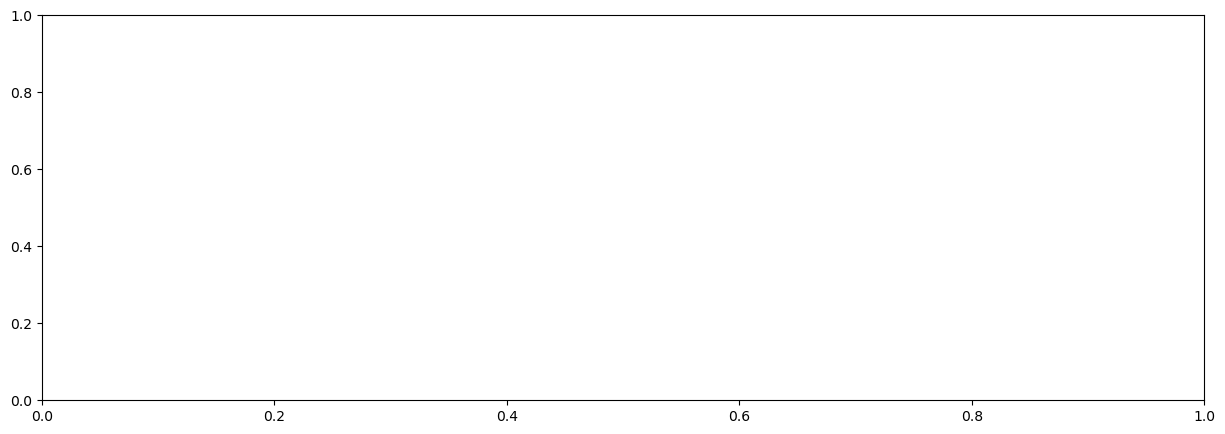

In [16]:
#### Construct travel time plot for participants arranged by day of the week and trip purpose
dt_3 = dt[(dt["TRVLCMIN"] > 0) & (dt["TRVLCMIN"] < 60) & ((dt['TRAVDAY'] == 1) | (dt['TRAVDAY'] == 7))]

fig, ax = plt.subplots(figsize = (15, 5))
sns.swarmplot(data = dt_3.loc[1:2000,:], # We have to limit used data to enable theplot creation
              x = 'TRVLCMIN', 
              y = 'Day of the Week', 
              hue = 'Purpose of the Trip', 
              size = 2) # We also reduced size of the data dots from the default value because of the size of the data set

plt.show()

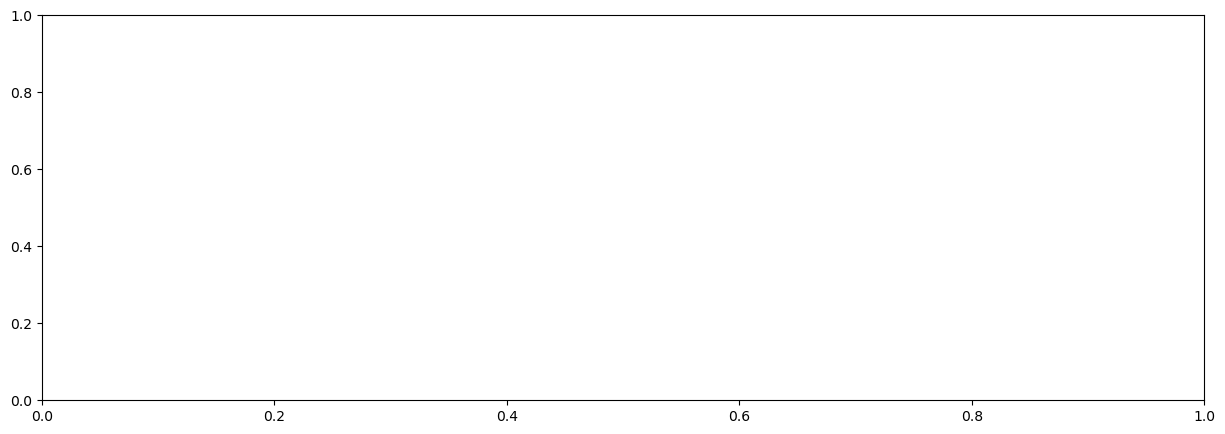

In [17]:
#### Construct travel time plot for participants arranged by day of the week and trip purpose
dt_4 = dt[(dt["TRPMILES"] > 0) & (dt["TRPMILES"] < 2) & ((dt['TRAVDAY'] == 3) | (dt['TRAVDAY'] == 7))]

fig, ax = plt.subplots(figsize = (15, 5))
sns.swarmplot(data = dt_4, x = 'TRPMILES', 
              y = 'Day of the Week', 
              hue = 'Purpose of the Trip', 
              size = 4) # We also reduced size of the data dots from the default value because of the size of the data set

plt.show()


Let's explore commute travel distance (variable TRPMILES) by gender and by mode of transportation and place them side by side using subplots. You are required to type your code below.

In [18]:
### Decoding modes
mode_map = {1: "Car/Taxi/Uber/etc.",
            2: "Car/Taxi/Uber/etc.",
            3: "Car/Taxi/Uber/etc.",
            4: "Car/Taxi/Uber/etc.",
            5: "Car/Taxi/Uber/etc.",
            6: "Car/Taxi/Uber/etc.",
            7: "Car/Taxi/Uber/etc.",
            8: "Public transit",
            9: "Public transit",
            10: "Public transit",
            11: "Public transit",
            12: "Public transit",
            13: "Other",
            14: "Other",
            15: "Car/Taxi/Uber/etc.",
            16: "Car/Taxi/Uber/etc.",
            17: "Public transit",
            18: "Active mode",
            19: "Active mode",
            20: "Active mode",
            21: "Other"}

dt['Mode of Transportation'] = dt['TRPTRANS'].astype(str).map(mode_map)

dt_5 = dt[(dt["TRPMILES"] > 0) & (dt["TRPMILES"] < 20)]



In [19]:
dt_5.head()

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP,OBHUR,DBHUR,TRIPMODE,OTHTNRNT,OTPPOPDN,OTRESDN,OTEEMPDN,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN,Day of the Week,Purpose of the Trip,Mode of Transportation
0,9000013002,1,1,1,900001300201,1,2,1,1,1,2,75,2,3,1,50,15,1435,1450,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,15,2,3.902424,1.608362e+06,0.0,1.569852e+06,90000130020101,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11,4,4,1,20,4,2,5,5,4,3,5,5,3,6,5,4,3,Sunday,3 Home-based social/recreational,NaN
1,9000013002,1,2,2,900001300201,1,2,1,1,1,2,-9,2,3,15,1,10,1605,1615,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,1,1,3.902424,1.608362e+06,0.0,1.569852e+06,90000130020102,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11,4,4,1,5,5,3,6,5,4,3,20,4,2,5,5,4,3,Sunday,3 Home-based social/recreational,NaN
2,9000013002,2,1,1,900001300202,1,-1,1,1,1,2,10,2,2,1,80,30,700,730,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-1,17.077067,2.208973e+06,0.0,2.274239e+06,90000130020201,17.077067,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11,4,2,1,20,4,2,5,5,4,3,40,5,4,6,60,4,3,Sunday,2 Home-based shopping,NaN
3,9000013002,2,2,2,900001300202,1,-1,1,1,1,2,10,2,5,12,80,10,740,750,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-9,4.748291,2.208973e+06,0.0,2.274239e+06,90000130020202,4.748291,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11,2,2,1,40,5,4,6,60,4,3,5,3,2,4,5,3,2,Sunday,5 Not a home-based trip,NaN
4,9000013002,2,3,3,900001300202,1,-1,1,1,1,2,-9,2,2,12,1,30,800,830,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,1,-9,14.098819,2.208973e+06,0.0,2.274239e+06,90000130020203,14.098819,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11,2,4,1,5,3,2,4,5,3,2,20,4,2,5,5,4,3,Sunday,2 Home-based shopping,NaN


### Boxplots and Violin Plots and Subplots

Next type of graph is a boxplot. A boxplot is a standardized way of displaying the distribution of data based on a five number summary: “minimum”, first quartile, median, third quartile and “maximum”. We have seen those numbers for every column using function df.describe() (see above).

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

A violin plot is a combination of a box plot and a density plot. It shows the full distribution of the data, which can be more informative than a standard box plot.However, this plot can be less intuitive to read for those unfamiliar with them.

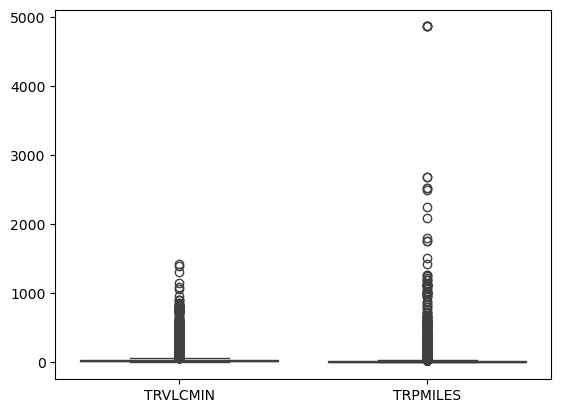

In [20]:
sns.boxplot(data = dt.loc[:, ["TRVLCMIN", "TRPMILES"]]) # We are boxplotting travel time and distance of the original data set
plt.show()

Note, that plot above contains 2 graphs with different units along y-axis. Such plot design is not a good practice. Those two graphs should be separated in two box plots because units are different. In addition, we should remove outliers here as well! Let's do it below.

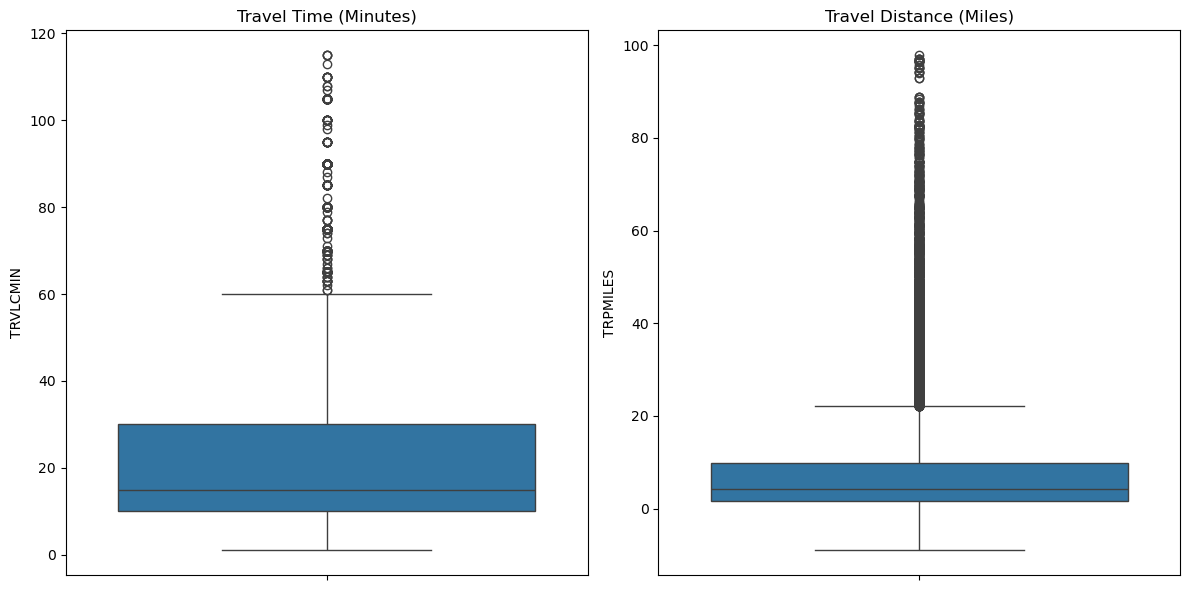

In [21]:
dt_6 = dt[(dt["TRIPPURP"] != -9) & (dt["TRVLCMIN"] < 120) & (dt["TRVLCMIN"] > 0) & (dt["TRPMILES"] < 100)]

plt.figure(figsize = (12, 6)) # Set the size for the overall figure

### First subplot 
plt.subplot(1, 2, 1) # (1 row, 2 columns, activate plot 1)
sns.boxplot(data = dt_6, y = 'TRVLCMIN')
plt.title('Travel Time (Minutes)')


### Second subplot
plt.subplot(1, 2, 2) # (1 row, 2 columns, activate plot 2)
sns.boxplot(data = dt_6, y = 'TRPMILES')
plt.title('Travel Distance (Miles)')


### Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()
plt.show()


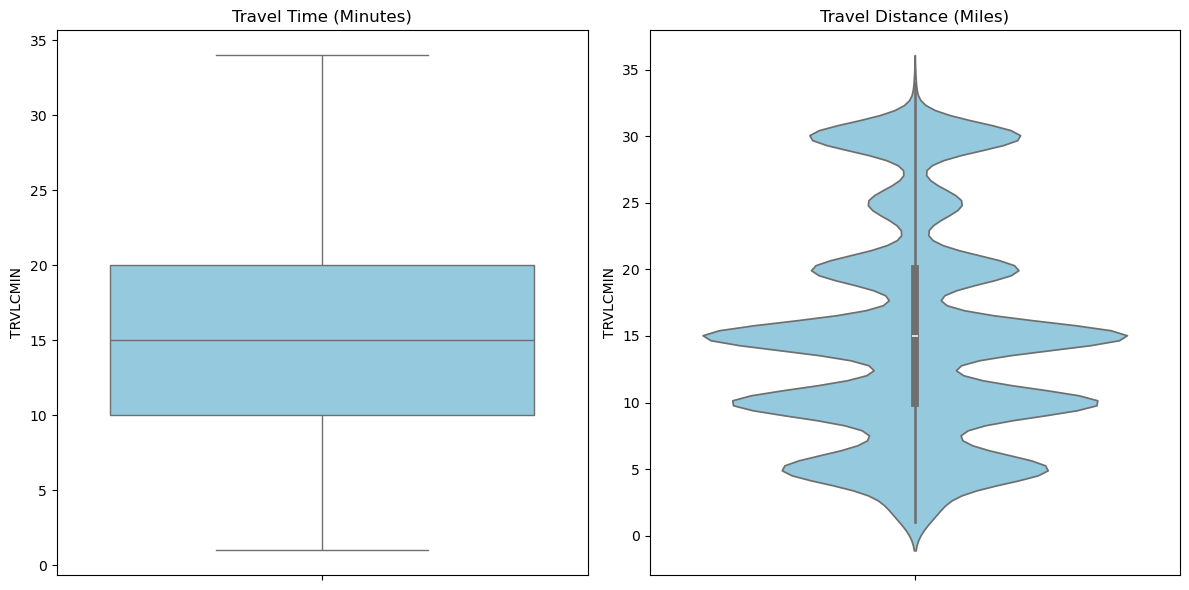

In [22]:
dt_7 = dt[(dt["TRIPPURP"] != -9) & (dt["TRVLCMIN"] < 35) & (dt["TRVLCMIN"] > 0) & (dt["TRPMILES"] < 20)]

plt.figure(figsize = (12, 6)) # Set the size for the overall figure

### First subplot 
plt.subplot(1, 2, 1) # (1 row, 2 columns, activate plot 1)
sns.boxplot(data = dt_7, y = 'TRVLCMIN', color = "skyblue")
plt.title('Travel Time (Minutes)')


### Second subplot
plt.subplot(1, 2, 2) # (1 row, 2 columns, activate plot 2)
sns.violinplot(data = dt_7, y = 'TRVLCMIN', color = "skyblue")
plt.title('Travel Distance (Miles)')


### Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()
plt.show()


## Visualizing Three or More Variables

When you need to explore complex interactions, faceted plots are the most powerful tool. 

Faceted Plots (catplot)

Seaborn's catplot function allows you to take a simple plot (like a count plot or box plot) and create a grid of them, where each subplot represents a different category of a third or fourth variable.

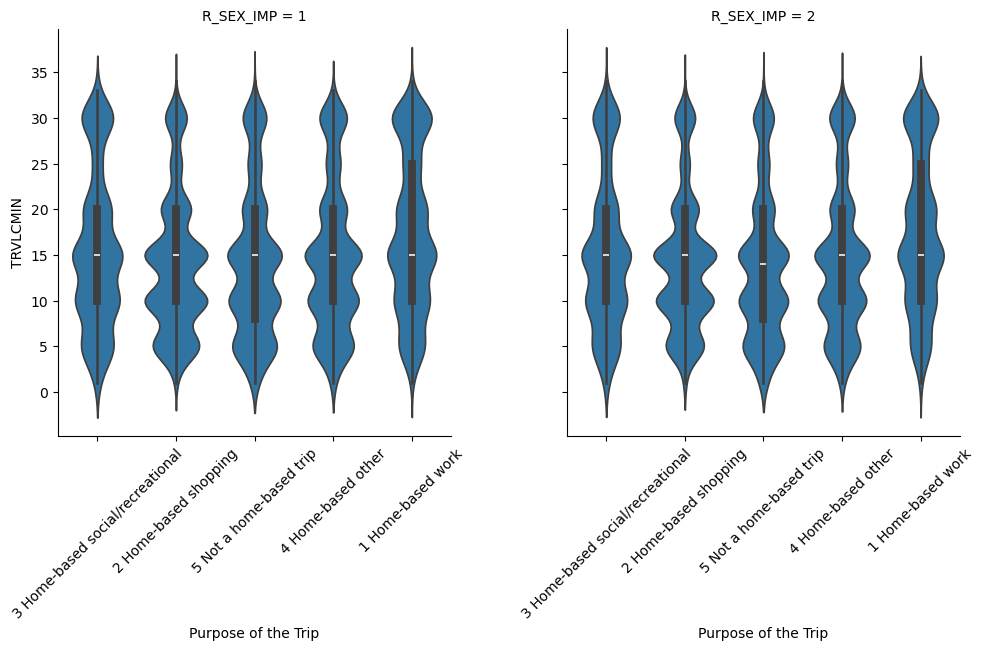

In [23]:
### Creates separate box plots for males and females
g = sns.catplot(
    data = dt_7,
    x = "Purpose of the Trip",
    y = "TRVLCMIN",
    kind = "violin",  # Specify the type of plot to be used
    col = "R_SEX_IMP") # Create columns for each category based on gender column

### Rotate the x-axis labels on the FacetGrid object
g.set_xticklabels(rotation = 45)
    
plt.show()

## Heatmap

In [24]:
dh.head()

,HOUSEID,WTHHFIN,WTHHFIN5D,WTHHFIN2D,NUMADLT,HOMEOWN,HOMETYPE,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CNTTDHH,CDIVMSAR,FLAG100,HHFAMINC,HHFAMINC_IMP,HH_RACE,HHSIZE,HHVEHCNT,HHRELATD,LIF_CYC,MSACAT,MSASIZE,TRAVDAY,URBAN,URBANSIZE,URBRUR,PPT517,YOUNGCHILD,RESP_CNT,URBRUR_2010,TDAYDATE,WRKCOUNT,STRATUMID,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,9000013002,4621.758002,0.000000,13946.191168,2,1,1,1,1,1,2,2,7,11,1,11,11,1,4,2,1,4,1,5,1,1,4,1,2,0,4,1,202202,1,1021,4,20,4,2,5,5,4,3
1,9000013016,2982.998407,3878.814279,0.000000,2,3,3,2,1,1,2,2,6,13,1,7,7,1,2,1,1,2,3,3,4,1,2,1,0,0,2,1,202202,2,1021,3,80,7,3,8,90,7,6
2,9000013026,9979.573402,14700.796695,0.000000,1,3,3,1,1,1,2,1,0,11,1,10,10,1,1,0,2,1,1,5,3,1,4,1,0,0,1,1,202202,1,1021,5,60,7,6,8,70,7,3
3,9000013039,10355.890735,13150.678996,0.000000,2,3,3,1,1,1,2,2,2,11,1,7,7,1,4,1,1,6,1,4,5,1,4,1,2,0,4,1,202201,1,1021,5,60,7,6,8,60,7,2
4,9000013041,4926.862529,7061.357485,0.000000,1,1,2,2,1,1,2,1,0,12,1,11,11,1,1,1,2,1,2,4,2,1,3,1,0,0,1,1,202201,1,1021,4,30,5,4,6,40,6,5


In [25]:
dh.NUMADLT.unique()

array([2, 1, 3, 8, 4, 5, 6, 7])

In [26]:
dh.HOMEOWN.unique() # Whether home owned or


array([1, 3, 2, 4])

In [27]:
### Decoding modes
home_map = {1: "Owned by hh member with mortgage or loan",
            2: "Owned by hh member free and clear (no mortgage)",
            3: "Rented by hh member",
            4: "Occupied without payment"}

dh['Home Ownership'] = dh['HOMEOWN'].astype(str).map(home_map)

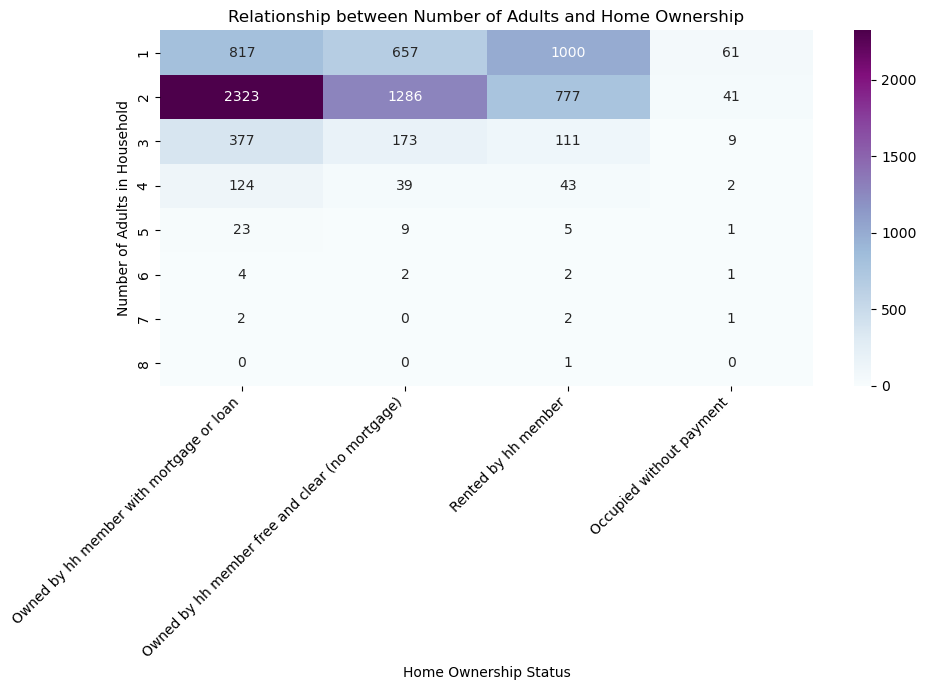

In [28]:
### Create a contingency table (crosstab)
contingency_table = pd.crosstab(dh['NUMADLT'], dh['HOMEOWN'])

### Plot the heatmap
plt.figure(figsize = (10, 7))
ax = sns.heatmap(contingency_table, annot = True, fmt = 'd', cmap = 'BuPu')
### annot = True writes the count in each cell
### fmt = 'd' ensures the numbers are formatted as integers
### cmap = 'BuPu' is a color scheme (blue-purple)

### Prepare the ordered list of labels
x_labels = [home_map[key] for key in contingency_table.columns]

### Set the custom x-axis tick labels
ax.set_xticklabels(x_labels, rotation = 45, ha = 'right') # ha - (horizontal alignment) to make the longer labels readable

# Set titles and labels
plt.title('Relationship between Number of Adults and Home Ownership')
plt.ylabel('Number of Adults in Household')
plt.xlabel('Home Ownership Status')

plt.tight_layout() # Ensure labels fit
plt.show()

## Histogram

Histogram is a diagram consisting of rectangles whose area is proportional to the frequency of a variable and whose width is equal to the class interval. In python, it is a visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins. You can adjust bins!

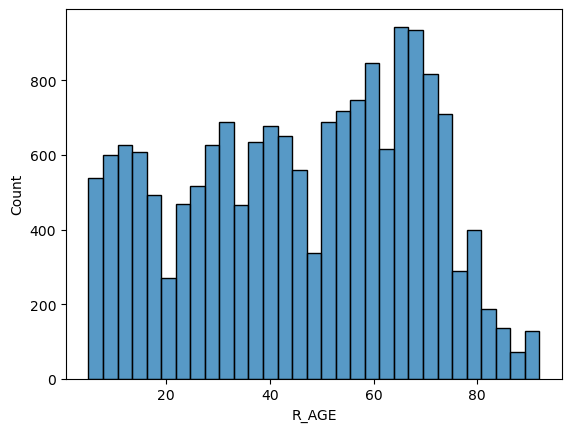

In [29]:
#### Distribution Plot (a.k.a. Histogram) of participants' ages (in years)
sns.histplot(dp.R_AGE)
plt.show()

# Homework question 1


Create a heat map for 2 variables WHYFROM and WHYTO
WHYFROM - Reason for previous trip
WHYTO - Reason for travel to
destination

WHYTO,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,97
WHYFROM,,,,,,,,,,,,,,,,,,,,
1,214,37,2280,90,206,877,52,117,55,915,498,1221,1875,745,570,1018,721,49,611,25
2,104,12,16,6,6,4,1,1,1,45,2,29,29,19,9,15,11,0,5,0
3,1985,31,172,46,32,2,2,4,4,89,19,100,110,38,20,16,36,15,14,1
4,71,12,32,73,15,0,0,0,2,2,1,7,19,5,5,1,4,2,4,0
5,141,27,32,16,51,0,1,0,4,8,9,19,24,12,2,2,1,3,1,0
6,788,2,9,0,0,48,7,0,7,37,7,10,17,8,12,10,14,0,4,1
7,41,3,7,0,1,2,6,0,1,2,0,0,3,1,1,3,1,0,0,0
8,95,2,2,1,1,0,0,26,0,5,0,5,11,5,1,0,8,1,1,0
9,73,3,12,2,0,13,0,0,39,9,2,3,6,3,3,0,13,4,5,0


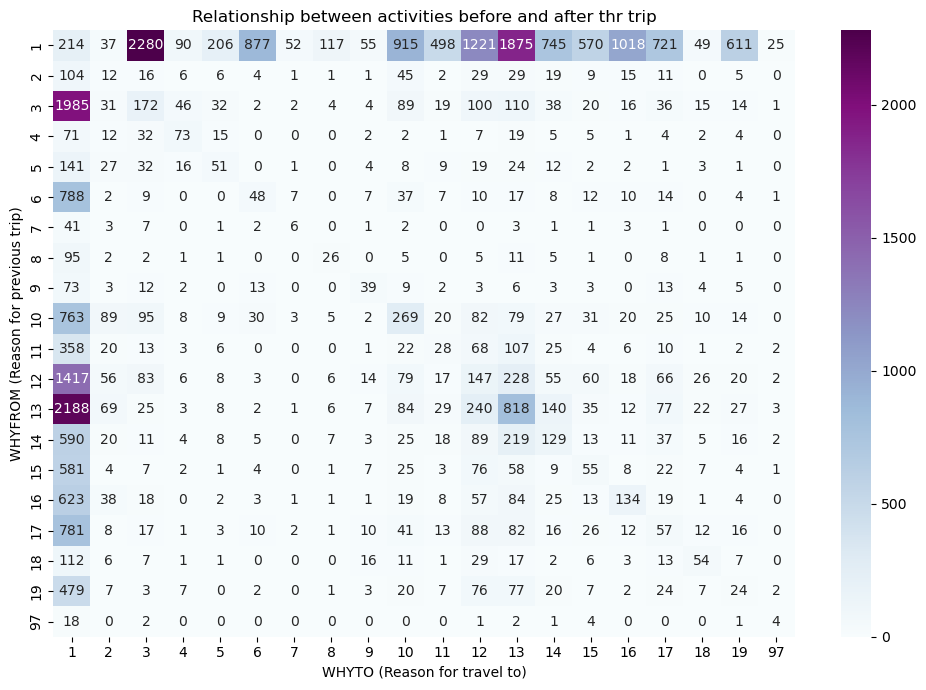

In [30]:
### Create a contingency table (crosstab)
dt_q1 = dt[(dt['WHYFROM'] != -9)]

contingency_table_2 = pd.crosstab(dt_q1['WHYFROM'], dt_q1['WHYTO'])
display(contingency_table_2)

### Plot the heatmap
plt.figure(figsize = (10, 7))
ax = sns.heatmap(contingency_table_2, annot = True, fmt = 'd', cmap = 'BuPu')


# # Set titles and labels
plt.title('Relationship between activities before and after thr trip')
plt.ylabel('WHYFROM (Reason for previous trip)')
plt.xlabel('WHYTO (Reason for travel to)')

plt.tight_layout() # Ensure labels fit
plt.show()

## Homework questions 2-4
In next three cells you will explore distribution of travel times for commute and non-commute trips.
You need to do the following:

2 - Plot a **histogram and a boxplot** of trip travel times as a separated subplots in one plot (one under another) after **removing outliers** (you can use dt_2, dt_7 or choose your treshholds).

3 - Plot **two violin** as a separated graphs in one plot **side by side** on males and females dwel times. Remove outliers.

4 - Discuss observed differences in 2-3 sentences.

count    17210.000000
mean        26.250610
std         50.579379
min          1.000000
25%         10.000000
50%         15.000000
75%         30.000000
max       1425.000000
Name: TRVLCMIN, dtype: float64

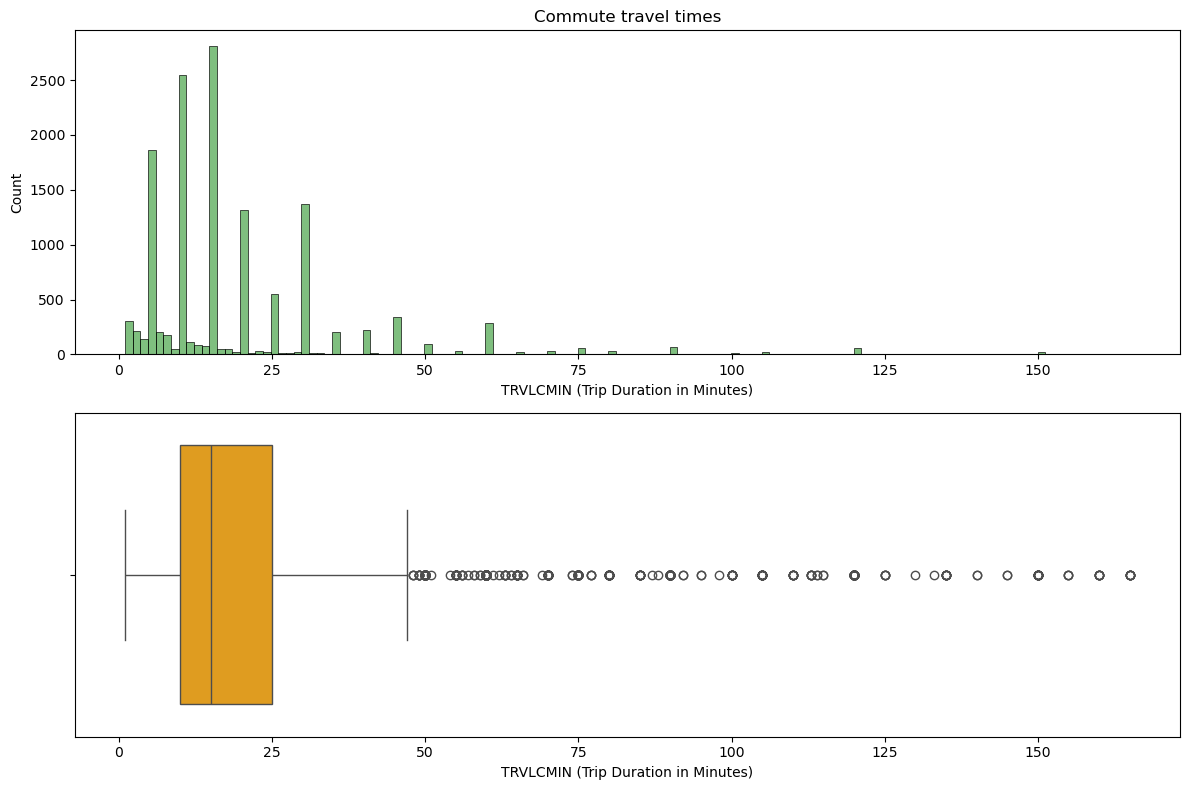

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


count    13719.000000
mean        19.625483
std         18.774111
min          1.000000
25%         10.000000
50%         15.000000
75%         25.000000
max        165.000000
Name: TRVLCMIN, dtype: float64

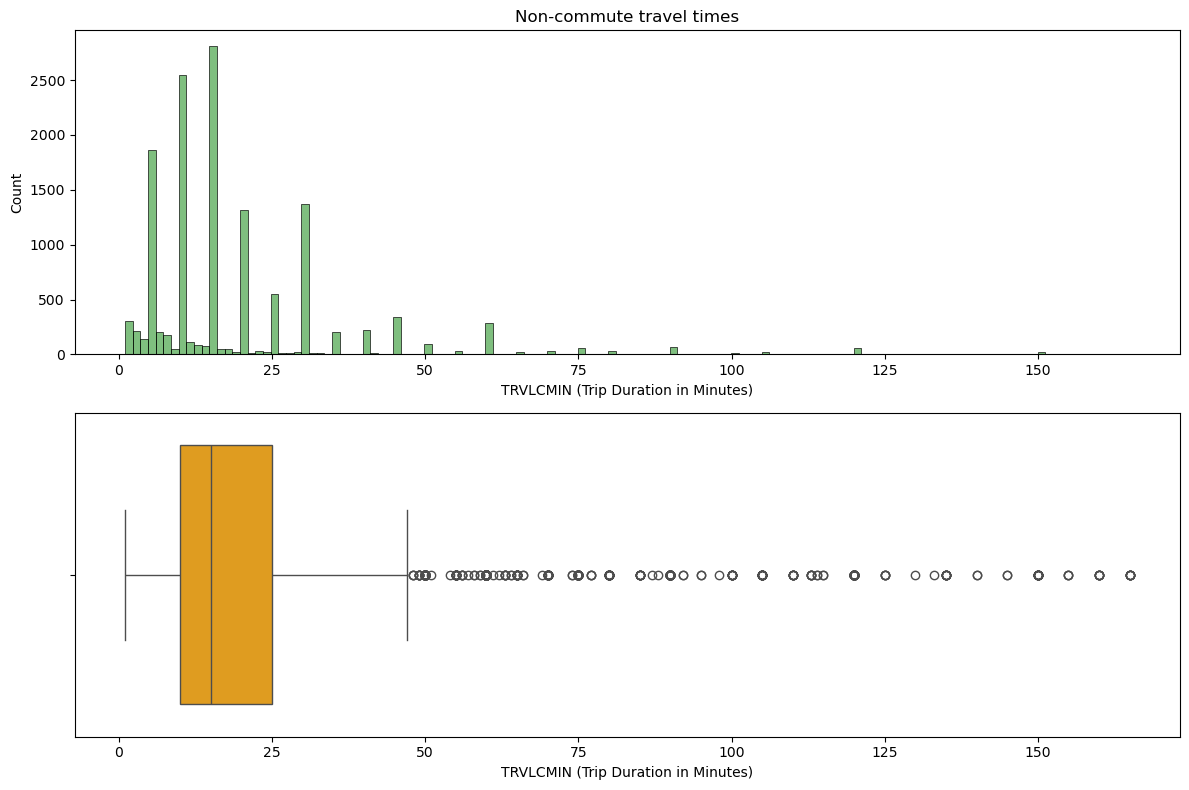

In [60]:
### Homework Question 2
#### Create a new data set by removing outliers for travel time

dt_q2 = dt[(dt['TRVLCMIN'] != -9) & (dt['TRVLCMIN'] >0) & (dt['WHYTRP1S']<=20)]
dt_q2_series = pd.Series(dt_q2.TRVLCMIN)
display(dt_q2_series.describe()) 

# After deleting the redundance, the mean is 24.57 and std is 46.49. To reduce the impact of extreme values while keeping most of the data, we choose to limit values to within three standard deviations from the mean

dt_q2 = dt[(dt['TRVLCMIN'] != -9) & (dt['TRVLCMIN'] <= 165) & (dt['TRVLCMIN'] >0) & (dt['WHYTRP1S']>20)]

#### Plot a histogram and a boxplot of travel times

plt.figure(figsize = (12, 8))

plt.subplot(2, 1, 1) # Activating the first plot
sns.histplot(x='TRVLCMIN',data=dt_q2,color='g',alpha=0.5).set_title("Commute travel times")
plt.xlabel('TRVLCMIN (Trip Duration in Minutes)')

plt.subplot(2, 1, 2) # Activating the second plot
sns.boxplot(x='TRVLCMIN',data=dt_q2,color='orange')
plt.xlabel('TRVLCMIN (Trip Duration in Minutes)')
plt.tight_layout()
plt.show()

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

# the following is the plots for non-commute trips

dt_q2_non = dt[(dt['TRVLCMIN'] != -9) & (dt['TRVLCMIN'] >0) & (dt['TRVLCMIN'] <= 165) & (dt['WHYTRP1S']>20)] 
dt_q2_non_series = pd.Series(dt_q2_non.TRVLCMIN)
display(dt_q2_non_series.describe())

plt.figure(figsize = (12, 8))

plt.subplot(2, 1, 1) # Activating the first plot
sns.histplot(x='TRVLCMIN',data=dt_q2_non,color='g',alpha=0.5).set_title("Non-commute travel times")
plt.xlabel('TRVLCMIN (Trip Duration in Minutes)')

plt.subplot(2, 1, 2) # Activating the second plot
sns.boxplot(x='TRVLCMIN',data=dt_q2_non,color='orange')
plt.xlabel('TRVLCMIN (Trip Duration in Minutes)')
plt.tight_layout()
plt.show()


count    7432.000000
mean      288.753633
std       208.718727
min         1.000000
25%        90.000000
50%       255.000000
75%       475.000000
max      1025.000000
Name: DWELTIME, dtype: float64

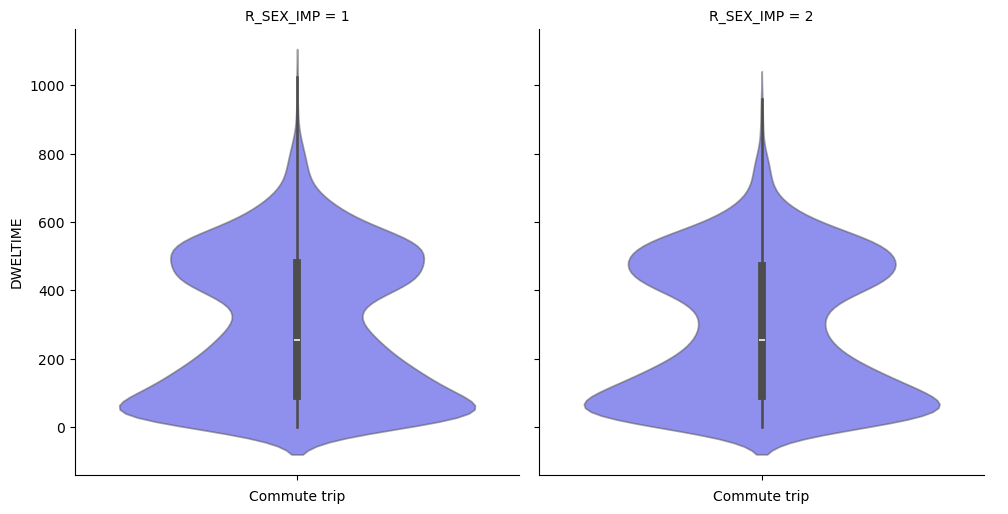

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


count    7432.000000
mean      288.753633
std       208.718727
min         1.000000
25%        90.000000
50%       255.000000
75%       475.000000
max      1025.000000
Name: DWELTIME, dtype: float64

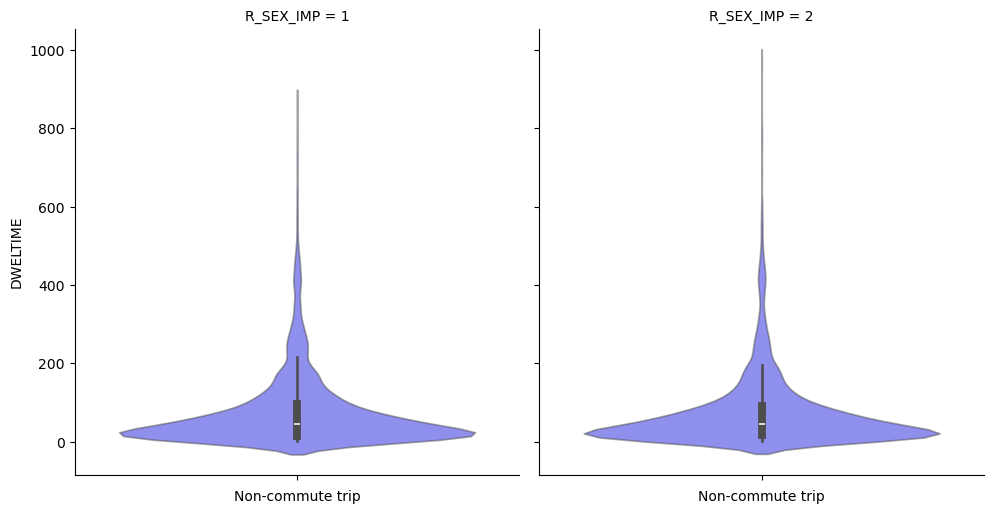

In [61]:
### Homework Question 3
#### Create a new data set by removing outliers for dweling time

dt_q3 = dt[(dt['DWELTIME'] != -9) & (dt['DWELTIME'] > 0) & (dt['TRVLCMIN'] <=700) & (dt['WHYTRP1S']<=20)]
dt_q3_series = pd.Series(dt_q3.DWELTIME)
display(dt_q3_series.describe())

### Plot a violin plot for both variables side by side

g = sns.catplot(y='DWELTIME', data=dt_q3, col='R_SEX_IMP', color='b', kind='violin', alpha=0.5)
g.set_axis_labels('Commute trip')
plt.show()

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

dt_q3_non = dt[(dt['DWELTIME'] != -9) & (dt['DWELTIME'] > 0) & (dt['TRVLCMIN'] <=700) & (dt['WHYTRP1S']>20)]
dt_q3_series = pd.Series(dt_q3.DWELTIME)
display(dt_q3_series.describe())


g = sns.catplot(y='DWELTIME', data=dt_q3_non, col='R_SEX_IMP', color='b', kind='violin', alpha=0.5)
g.set_axis_labels('Non-commute trip')
plt.show()

#### Homework Question 4 (DIscussion)

**Differences:**
* 1 
* 2

# Homework Question 5 (Count Plot)

Show the counts of observations in each categorical bin using bars.
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
Hence, it can be used with "remapped data"!

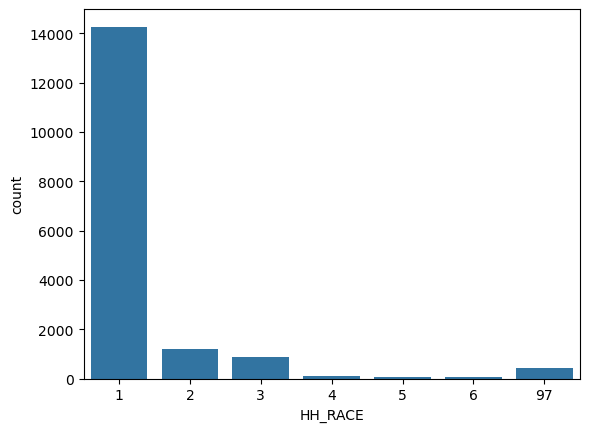

In [33]:
# Count Plot (a.k.a. Bar Plot) on categorical data 'ethnicity'
sns.countplot(x = 'HH_RACE', data = dp)

plt.show()

### Homework Question:
Plot a **Count plot** on participant race separetly for women and men after remapping race category to make plot looks nice.
 

,HOUSEID,PERSONID,WTPERFIN,WTPERFIN5D,WTPERFIN2D,R_AGE,R_SEX,R_RELAT,WORKER,DRIVER,R_RACE,GCDWORK,OUTOFTWN,USEPUBTR,R_RACE_IMP,R_HISP,PROXY,WHOPROXY,EDUC,LAST30_TAXI,LAST30_RDSHR,LAST30_ESCT,LAST30_PT,LAST30_MTRC,LAST30_WALK,LAST30_BIKE,LAST30_BKSHR,TAXISERVICE,RIDESHARE22,ESCOOTERUSED,PTUSED,TRNPASS,MCTRANSIT,WALKTRANSIT,BIKETRANSIT,BIKESHARE22,USAGE1,USAGE2_1,USAGE2_2,USAGE2_3,USAGE2_4,USAGE2_5,USAGE2_6,USAGE2_7,USAGE2_8,USAGE2_9,USAGE2_10,QACSLAN1,QACSLAN3,PAYPROF,PRMACT,EMPLOYMENT2,DRIVINGOCCUPATION,DRIVINGVEHICLE,WRKLOC,WKFMHM22,WRKTRANS,EMPPASS,SCHOOL1,STUDE,SCHTYP,SCHOOL1C,SCHTRN1,DELIVER,DELIV_GOOD,DELIV_FOOD,DELIV_GROC,DELIV_PERS,RET_HOME,RET_PUF,RET_AMZ,RET_STORE,MEDCOND,MEDCOND6,W_CANE,W_WKCR,W_VISIMP,W_SCCH,W_CHAIR,W_NONE,CONDTRAV,CONDRIDE,CONDNIGH,CONDRIVE,CONDPUB,CONDSPEC,CONDSHARE,CONDNONE,CONDRF,FRSTHM,PARK,PARKHOME,PARKHOMEAMT,PARKHOMEAMT_PAMOUNT,PARKHOMEAMT_PAYTYPE,SAMEPLC,COV1_WK,COV1_SCH,COV1_PT,COV1_OHD,COV2_WK,COV2_SCH,COV2_PT,COV2_OHD,CNTTDTR,R_SEX_IMP,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,TRAVDAY,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,HHFAMINC_IMP,WBHUR,SBHUR,WTHTNRNT,WTPPOPDN,WTRESDN,WTEEMPDN,WBHTNRNT,WBPPOPDN,WBRESDN,STHTNRNT,STPPOPDN,STRESDN,STEEMPDN,SBHTNRNT,SBPPOPDN,SBRESDN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,HH_RACE_new
11168,9000147131,1,10303.219856,14379.101206,0.0,38,2,7,1,1,1,-9.000000,2,2,1,2,1,-1,4,2,2,2,2,2,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,2,2,2,2,2,2,2,2,2,-1,1,-1,35,2,-1,3,4,-1,-1,2,-1,-1,-1,-1,10,10,-9,-9,-9,0,0,0,0,1,3,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,1,2,-1,-1,-1.0,-1,-1,3,-1,4,2,2,-1,-1,-1,2,2,2,1,2,6,3,2,2,63,6,1,4,2,6,3,3,4,1,3,1,202211,2,1031,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,20,2,1,2,30,2,2,Caucasian/White
14978,9000208913,3,6062.909407,10377.734187,0.0,22,2,2,2,1,1,-1.000000,2,2,1,2,2,1,6,2,2,2,2,2,1,2,-1,-1,-1,-1,-1,-1,-1,30,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,2,97,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,-1,-1,5,5,0,0,0,0,0,0,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1.0,-1,-8,-1,-1,3,1,-1,-1,2,2,0,2,4,1,1,2,1,2,4,21,11,1,4,4,2,1,5,3,1,4,1,202212,3,1023,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,5,6,4,7,20,6,4,Caucasian/White
6624,9000089347,1,10322.364259,14297.913605,0.0,19,2,7,2,1,1,-1.000000,2,2,1,1,1,-1,5,2,2,2,2,2,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,2,2,2,2,2,2,1,2,2,2,-1,2,97,-1,-1,-1,-1,-1,-1,-1,1,4,-1,2,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1.0,-1,7,-1,3,4,2,-1,2,-1,-1,0,2,1,3,2,7,3,1,1,72,6,1,1,1,1,2,4,2,1,5,1,202207,0,1033,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,80,6,5,7,80,5,5,Caucasian/White
13764,9000170780,1,3609.451450,5172.061723,0.0,52,1,7,1,2,1,0.651304,2,2,1,2,1,-1,4,2,2,2,1,2,1,1,2,-1,-1,-1,2,2,-1,30,5,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,1,-1,30,2,-1,1,1,20,-1,2,-1,-1,-1,-1,4,4,0,0,0,0,0,0,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1.0,-1,6,3,-1,3,1,2,-1,1,2,0,1,1,3,1,3,2,2,0,31,3,1,1,0,1,1,5,5,1,4,1,202211,1,1025,3,5,-1,5,6,5,7,20,6,5,-1,-1,-1,-1,-1,-1,-1,5,60,7,7,8,70,8,7,Caucasian/White
7638,9000098733,1,63324.932900,84361.302923,0.0,51,2,7,1,1,2,-9.000000,2,2,2,2,1,-1,5,2,1,2,2,2,1,2,-1,-1,4,-1,-1,-1,-1,2,-1,-1,1,1,2,2,2,2,1,2,2,2,2,2,-1,1,-1,20,2,-1,4,1,1,-1,2,-1,-1,-1,-1,3,2,1,-9,-9,-9,-9,-9,-9,-7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,-1,-1,-1.0,-1,-1,3,-1,4,1,1,-1,-1,2,2,2,4,3,2,5,3,2,3,53,6,2,4,2,10,3,1,3,4,6,2,202206,3,1030,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,30,2,1,3,40,2,-9,Black or African American


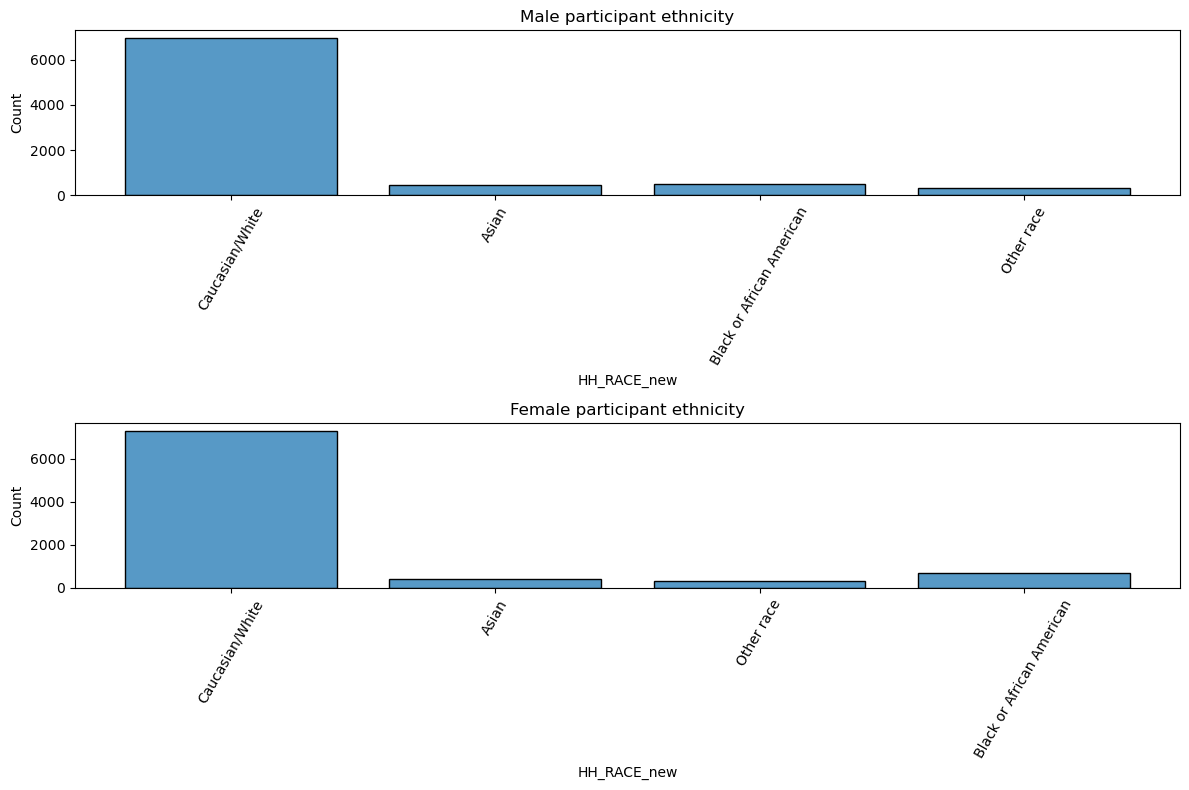

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


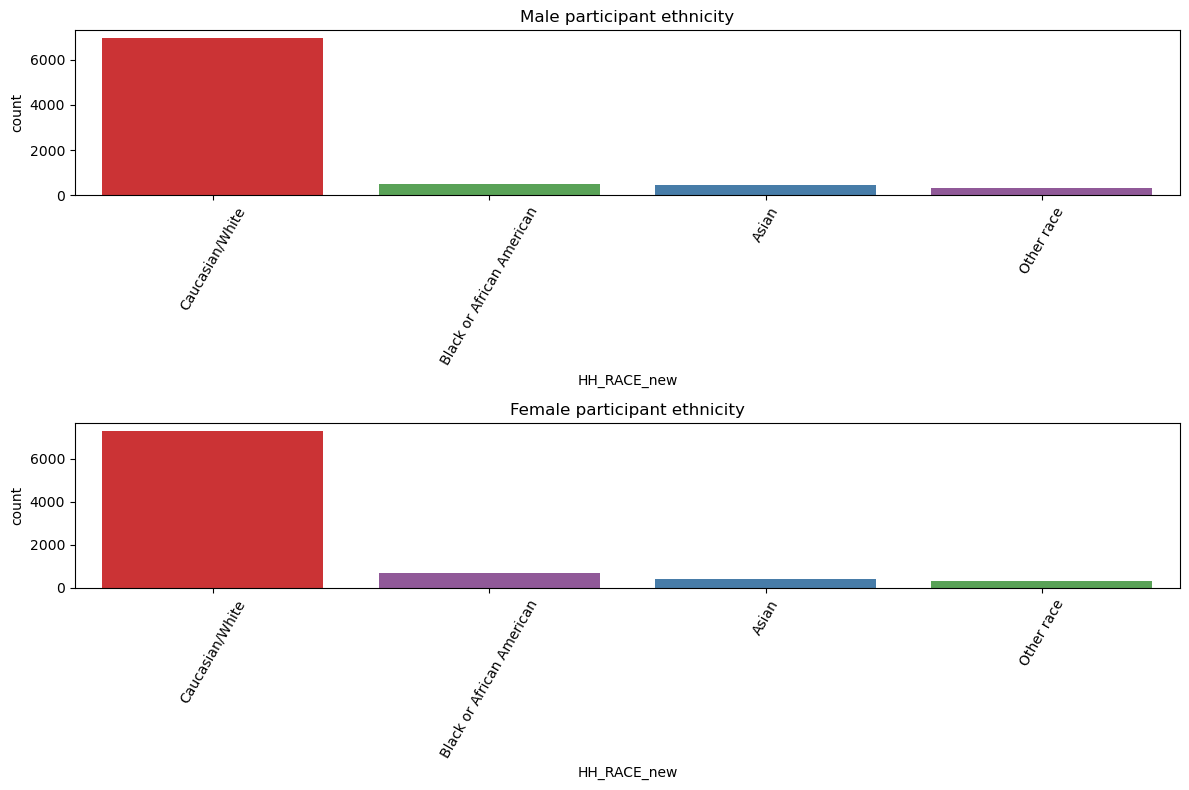

In [34]:
#### Plot a histogram of participant ethnicities

#### First, create a new column and map new values. Use cookbook for categories names. You can combine categories 04, 05, 06, 97 in one "Other race"
race_map = {1: "Caucasian/White", 
            2: "Black or African American", 
            3: "Asian", 
            4: "Other race", 
            5: "Other race",
            6: "Other race", 
            97: "Other race"}


dp['HH_RACE_new'] = dp['HH_RACE'].map(race_map)
display(dp.sample(5))

dp_q5_male = dp[(dp['R_SEX_IMP'] == 1)]
dp_q5_female = dp[(dp['R_SEX_IMP'] == 2)]

### Now, let's build 2 plots
plt.figure(figsize = (12, 8))

plt.subplot(2, 1, 1) # Activating the first plot
sns.histplot(x='HH_RACE_new', data=dp_q5_male, shrink=0.8).set_title("Male participant ethnicity") # To select ONLY males, use condition dp['R_SEX_IMP'] == 1
plt.xticks(rotation=60)

plt.subplot(2, 1, 2) # Activating the second plot
sns.histplot(x='HH_RACE_new', data=dp_q5_female, shrink=0.8).set_title("Female participant ethnicity") # To select ONLY females, use condition dp['R_SEX_IMP'] == 21
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

order = ["Caucasian/White", 
         "Black or African American", 
         "Asian", 
         "Other race"]

plt.figure(figsize = (12, 8))

plt.subplot(2, 1, 1) 
sns.countplot(x='HH_RACE_new', 
              data=dp_q5_male,
              order=order,
              hue='HH_RACE_new',
              palette='Set1',
              legend=False).set_title("Male participant ethnicity") # To select ONLY males, use condition dp['R_SEX_IMP'] == 1
plt.xticks(rotation=60)

plt.subplot(2, 1, 2) 
sns.countplot(x='HH_RACE_new',
              data=dp_q5_female,
              order=order,
              hue='HH_RACE_new',
              palette='Set1',
              legend=False).set_title("Female participant ethnicity") # To select ONLY females, use condition dp['R_SEX_IMP'] == 21
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

# To submit your homework:

    1 - Run all code cells 

    2 - Answer all questions

    3 - Download as pdf (you can use print the page and save it as pdf)  

    4 - Inspect the pdf file (all cells are executed and all questions are answered?)

    5 - If it looks good

            - Rename it as following *WA4_first_last* replacing *first_last* with your first and last names
    
            - Upload pdf to UBLearns/BrightSpace
    
        else
    
            - Fix the issue
    
            - Repeat from step 3
    

<div class="alert alert-block alert-info">
<b>Tip:</b> you may need to install additional libriaries to enable download into pdf funciton using pip and command window, specifically: >pyppeteer-install and/or nbconvert[webpdf].
</div>